In [442]:
import os
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression

In [443]:
df = pd.read_csv("timeseries/external.csv", sep=",", index_col="date")
df = df.drop("Unnamed: 0", axis=1)
df.index.names = ["Date"]
df

,PriceUSD,HashRate
Date,,
2015-01-02,315.942732,3.333450e+05
2015-01-03,285.647310,3.272842e+05
2015-01-04,263.334575,3.474869e+05
2015-01-05,275.003852,3.151626e+05
2015-01-06,287.549521,3.192031e+05
...,...,...
2017-06-26,2426.365051,5.023770e+06
2017-06-27,2530.345536,4.634604e+06
2017-06-28,2562.792264,5.554450e+06


<Axes: xlabel='Date'>

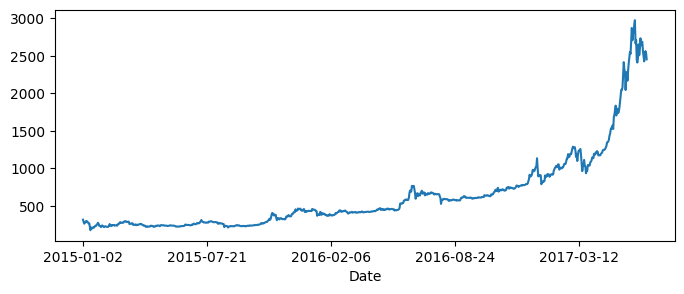

In [444]:
df.PriceUSD.plot(figsize=(8, 3))

<Axes: xlabel='Date'>

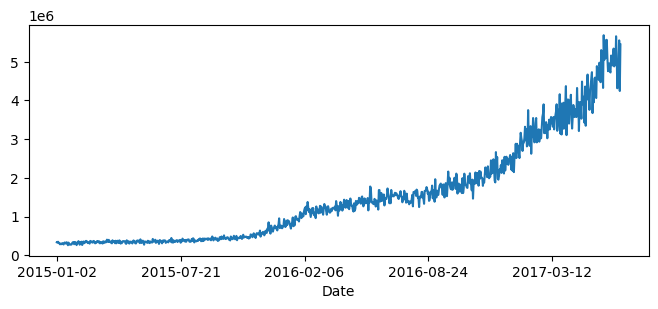

In [445]:
df.HashRate.plot(figsize=(8, 3))

In [446]:
# Printing correlations between variables
df.corr()

,PriceUSD,HashRate
PriceUSD,1.000000,0.937447
HashRate,0.937447,1.000000


In [447]:
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"]).map(dt.datetime.toordinal)

y = 1.5963403784515047 * x + -1174364.2202138337


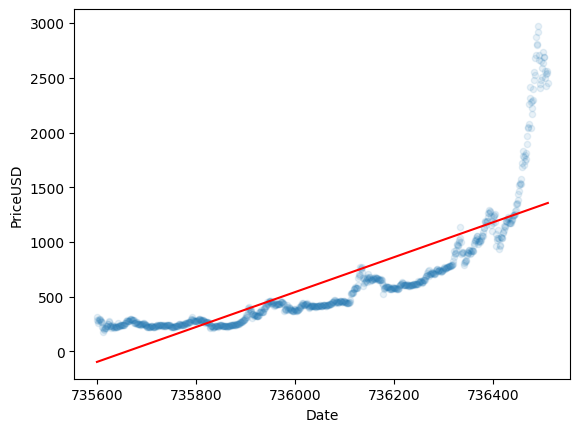

In [448]:
# Creating a Linear Regression model on our data
lin = LinearRegression()
lin.fit(df[["Date"]], df["PriceUSD"])

# Creating a plot
ax = df.plot.scatter(x="Date", y="PriceUSD", alpha=.1)
ax.plot(df["Date"], lin.predict(df[["Date"]]), c='r')

# Printing linear function from our regression
print("y = " + str(lin.coef_[0]) + " * x + " + str(lin.intercept_))

           3         2
9.578e-06 x - 21.15 x + 1.556e+07 x - 3.817e+12


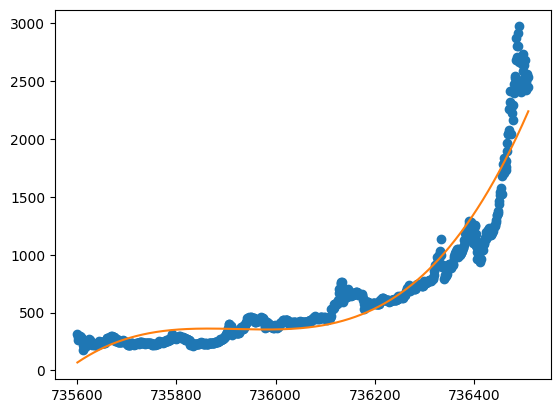

In [449]:
# Creating a Polynomial regression model from our data
fit = np.polyfit(df["Date"], df["PriceUSD"], 3)
fit1d = np.poly1d(fit)
print(fit1d)

# Creating a plot
plt.plot(df["Date"], df["PriceUSD"], 'o', label='Original data')
plt.plot(df["Date"], fit1d(df["Date"]), label='Fitted curve')

In [450]:
# Reconversion - Date column to index and datetime values
df = df.set_index("Date")
df.index = df.index.map(dt.datetime.fromordinal)

# Import global.csv into df2
df2 = pd.read_csv("timeseries/global.csv", sep=",", index_col="Unnamed: 0")
df2.index.names = ["Date"]
df2.index = pd.to_datetime(df2.index)

# Merge between df (external.csv) and df2 (global.csv)
df = df.merge(df2, how="inner", on="Date")
df.rename(columns = {'PriceUSD':'price_usd', 'HashRate':'hash_rate'}, inplace = True)
df

,price_usd,hash_rate,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,...,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,315.942732,3.333450e+05,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,...,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,285.647310,3.272842e+05,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,...,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,263.334575,3.474869e+05,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,...,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,275.003852,3.151626e+05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,...,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
2015-01-06,287.549521,3.192031e+05,2015,1,6,1296373032,118260758863552,117868258863552,14667.176159,4.217540e+06,...,88386,252571,2.869595,2.857591,157,393796373032,392500000000,4026430543611,118260758863552,114234328319941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,2426.365051,5.023770e+06,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,...,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
2017-06-27,2530.345536,4.634604e+06,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,...,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
2017-06-28,2562.792264,5.554450e+06,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,...,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847


correlation : nb_transactions and price_usd = 0.7009060681375398


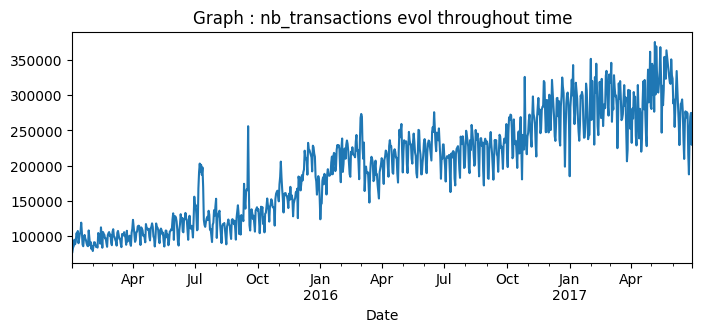

In [148]:
#Function to print correlation between col1 and col2, and their graphs if needed
def print_graph_corr(col1 : str, col2 : str, printGraph1 : bool, printGraph2 : bool) :
    if printGraph1 :
        df[col1].plot(title="Graph : " + col1 + " evol throughout time", figsize=(8, 3))
    
    if printGraph2 :
        df[col2].plot(title="Graph : " + col2 + " evol throughout time", figsize=(8, 3))

    print("correlation : " + col1 + " and " + col2 + " = " + str(df[col1].corr(df[col2])))

#Between nb_transaction and price_usd
print_graph_corr("nb_transactions", "price_usd", True, False)

correlation : nb_payments and price_usd = 0.5259850058477298


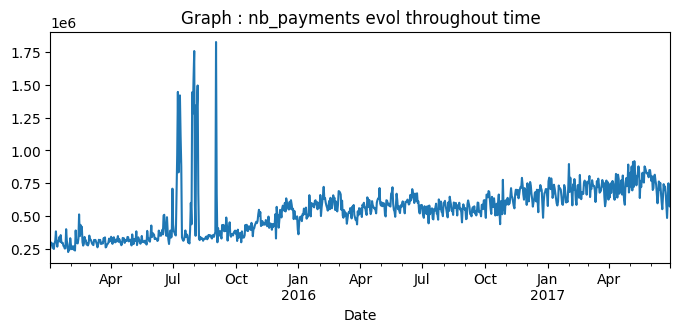

In [150]:
#Between nb_payments and price_usd
print_graph_corr("nb_payments", "price_usd", True, False)

In [151]:
#Between nb_transactions and nb_payments
print_graph_corr("nb_payments", "nb_transactions", False, False)

correlation : nb_payments and nb_transactions = 0.75442506270734


correlation : price_usd and newly_created_coins = -0.6392996477389676


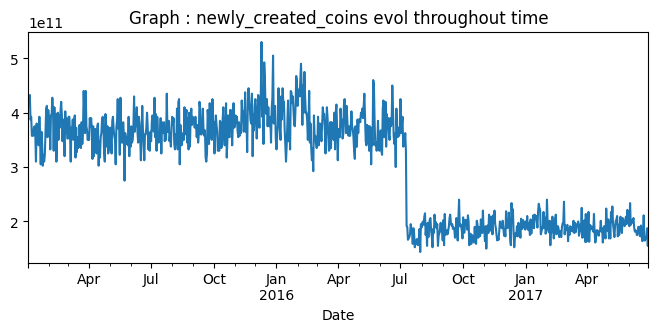

In [155]:
#Between price_usd and newly_created_coins
print_graph_corr("price_usd", "newly_created_coins", False, True)